In [1]:
import torch

In [5]:
# 참의 계수
w_true = torch.Tensor([1, 2, 3])

# X 데이터 준비. 절편을 회귀 계수에 포함시키기 위해
# X의 최초 차원에 1을 추가해둔다
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)


# 참의 게수와 각 X의 내적을 행렬과 벡터의 곱으로 모아서 계산
y = torch.mv(X, w_true) + torch.randn(100) * 0.5

# 기울기 하강으로 최적화하기 위해 파라미터 Tensor를
# 난수로 초기화해서 생성
w = torch.randn(3, requires_grad=True)

# 학습률
gamma = 0.1

torch.Size([100, 3])
tensor([[ 1.0000e+00,  5.5609e-01, -1.5375e+00],
        [ 1.0000e+00, -1.2314e+00, -9.9154e-01],
        [ 1.0000e+00, -2.7964e+00, -9.4070e-01],
        [ 1.0000e+00,  3.5730e-01, -5.0498e-01],
        [ 1.0000e+00, -4.2531e-01, -1.0912e+00],
        [ 1.0000e+00, -1.2813e+00, -8.6639e-01],
        [ 1.0000e+00, -4.4702e-01, -4.7861e-01],
        [ 1.0000e+00,  1.1560e+00,  3.8665e-01],
        [ 1.0000e+00,  9.0758e-01, -2.9635e+00],
        [ 1.0000e+00, -8.3751e-01, -1.7222e+00],
        [ 1.0000e+00, -4.7986e-01,  7.5200e-01],
        [ 1.0000e+00,  2.7226e-01, -1.1089e+00],
        [ 1.0000e+00,  5.9119e-01,  1.7951e+00],
        [ 1.0000e+00,  1.3757e-01, -3.1938e-01],
        [ 1.0000e+00, -1.2993e+00, -4.1220e-01],
        [ 1.0000e+00,  5.8324e-01, -9.8663e-01],
        [ 1.0000e+00, -3.8566e-01,  6.8396e-02],
        [ 1.0000e+00, -1.5530e+00,  8.0095e-01],
        [ 1.0000e+00, -7.6287e-01, -7.1007e-02],
        [ 1.0000e+00, -7.7926e-01,  2.7481e-01],

In [9]:
# 손실 함수의 로그
losses = []

# 100회 반복
for epoc in range(100):
    # 전회의 backward 메서드로 계산된 경사 값을 초기화
    w.grad = None

    # 선형 모델으로 y 예측 값을 계산
    y_pred = torch.mv(X, w)

    # MSE loss와 w에 의한 미분을 계산
    loss = torch.mean((y - y_pred)**2)
    loss.backward()

    # 경사를 갱신한다
    # w를 그대로 대입해서 갱신하면 다른 Tensor가 돼서
    # 계산 그래프가 망가진다. 따라서 data만 갱신한다
    w.data = w.data - gamma * w.grad.data

    # 수렴 확인을 위한 loss를 기록해둔다
    losses.append(loss.item())

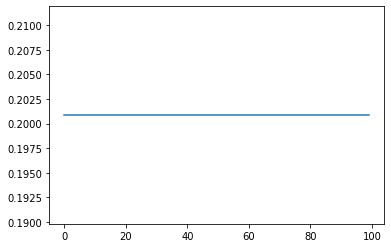

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)